# 1- Data wrangling<a id='1_Data_Wrangling'></a>

## 1.1 Contents<a id='1.1_Contents'></a>

* [1 Data Wrangling](#1_Data_Wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
      * [1.2.1 Accident Data](#1.2.1_Recap_of_Data_Science_Problem)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load The Data](#1.4_Load_The_Data)
    * [1.4.1 Accident Data](#1.4.1_Ski_data)
    * [1.4.2 Vehicle Data](#1.4.2_State-wide_summary_data)
    * [1.4.3 Casualty Data](#1.4.3_Ski_data)
    * [1.4.4 Look up Data](#1.4.4_State-wide_summary_data)
  * [1.5 Explore The Data](#1.5_Explore_The_Data)
    

## 1.2 Introduction<a id='1.2_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it's well defined. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.


### 1.2.1 Recap of Data Science Problem<a id='1.2.1_Recap_of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a model to predict the severity and fatality of accidents and the rate of them based on the dataset in UK. We can identify the regions and car models that might increase the rate of either cases and assess the safty. We paln to find the crusial factors that can minimize the rate of severe accidents as well as lower the fatality cases. This in turn can help policy makers in UK to enhance the safty of the roads.

This project aims to build a predictive model for severity/fatality based on a number of available data at the time of accidents, containing the location, time, cars involved and info on the drievers, and the road environmentat each accident event.
This model will be used to provide guidance for UK policy makers, first aid centers, Car manufacturers and insurance companies in UK.


## 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


## Load Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

There are 3 main data sets here (for now I only select the year 2020 data to do a faster analyse on it):

1- Accident file: main data set contains information about accident severity, weather, location, date, hour, day of week, road type… 

2- Vehicle file: contains information about vehicle type, vehicle model, engine size, driver sex, driver age, car age… 

3- Casualty file: contains information about casualty severity, age, sex social class, casualty type, pedestrian or car passenger… 

There is also an excel spreed sheet describing the details of each feature and the meaning of classifications: 

4- Lookup file: contains the text description of all variable code in the three files 



In [2]:
# the supplied CSV data file is the raw_data directory
ACC_PATH = "testData/dft-road-casualty-statistics-accident-2020.csv"
acc_df = pd.read_csv(ACC_PATH, parse_dates=["date"])
print("No. of rows: {}".format(acc_df.shape[0]))
print("No. of cols: {}".format(acc_df.shape[1]))

acc_df.head(2).T

No. of rows: 91199
No. of cols: 36


/Users/kaveh/AppsFolder/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1
accident_index,2020010219808,2020010220496
accident_year,2020,2020
accident_reference,10219808,10220496
location_easting_osgr,521389.0,529337.0
location_northing_osgr,175144.0,176237.0
longitude,-0.254001,-0.139253
latitude,51.462262,51.470327
police_force,1,1
accident_severity,3,3
number_of_vehicles,1,1


In [3]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64         


Though Most of the variables in the accident dataset are in numerical format, majority of them are categorical data exept (the 4 float variables for location coordinates and accident_year, number_of_vehicles, number_of_casualties ). 


We also have one variable that we explicitly set up as a datatime object while reading and four object variables:

    Accident_Index - index of the accident
    Time - time in a format HH:mm
    Local_Authority_(Highway) 
    LSOA_of_Accident_Location - categorical variables about location

Information about the variables and meaning of the categories could be found in Variable Lookup.


In [4]:
VEH_PATH = "testData/dft-road-casualty-statistics-vehicle-2020.csv"
veh_df = pd.read_csv(VEH_PATH)
print(veh_df.shape)
veh_df.head(2).T

(167375, 27)


/Users/kaveh/AppsFolder/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1
accident_index,2020010219808,2020010220496
accident_year,2020,2020
accident_reference,10219808,10220496
vehicle_reference,1,1
vehicle_type,9,9
towing_and_articulation,9,0
vehicle_manoeuvre,5,4
vehicle_direction_from,1,2
vehicle_direction_to,5,6
vehicle_location_restricted_lane,0,0


In [5]:
CAS_PATH = "testData/dft-road-casualty-statistics-casualty-2020.csv"
cas_df = pd.read_csv(CAS_PATH)
print("No. of rows: {}".format(cas_df.shape[0]))
print("No. of cols: {}".format(cas_df.shape[1]))

cas_df.head(2).T

No. of rows: 115584
No. of cols: 18


,0,1
accident_index,2020010219808,2020010220496
accident_year,2020,2020
accident_reference,010219808,010220496
vehicle_reference,1,1
casualty_reference,1,1
casualty_class,3,3
sex_of_casualty,1,2
age_of_casualty,31,2
age_band_of_casualty,6,1
casualty_severity,3,3


Casualty have direct relation to our target prediction 

#### error for files before seperating years 
IOPub data rate exceeded.
    The notebook server will temporarily stop sending output
    to the client in order to avoid crashing it.
    To change this limit, set the config variable
    `--NotebookApp.iopub_data_rate_limit`.

    Current values:
    NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
    NotebookApp.rate_limit_window=3.0 (secs)
    
    one solution use sql other use chunks:
    

In [6]:
Data_info = pd.read_excel('testData/Road-Safety-Open-Dataset-Data-Guide.xlsx')
Data_info.T

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
table,Accident,Accident,Accident,Accident,Accident,Accident,Accident,Accident,Accident,Accident,...,Casualty,Casualty,Casualty,Casualty,Casualty,Casualty,Casualty,Casualty,Casualty,Casualty
field name,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,Latitude,police_force,police_force,police_force,...,casualty_imd_decile,casualty_imd_decile,casualty_imd_decile,casualty_imd_decile,casualty_imd_decile,casualty_imd_decile,casualty_home_area_type,casualty_home_area_type,casualty_home_area_type,casualty_home_area_type
code/format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,4,...,6,7,8,9,10,-1,1,2,3,-1
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metropolitan Police,Cumbria,Lancashire,...,Less deprived 40-50%,Less deprived 30-40%,Less deprived 20-30%,Less deprived 10-20%,Least deprived 10%,Data missing or out of range,Urban area,Small town,Rural,Data missing or out of range
note,unique value for each accident. The accident_i...,NaN,In year id used by the police to reference a c...,Null if not known,Null if not known,Null if not known,Null if not known,NaN,NaN,NaN,...,field introduced in 2016,field introduced in 2016,field introduced in 2016,field introduced in 2016,field introduced in 2016,field introduced in 2016,field introduced in 1999,field introduced in 1999,field introduced in 1999,field introduced in 1999


## Explore The Data<a id='2.6_Explore_The_Data'></a>


We start by accident data set:

In [7]:
acc_col_list=list(acc_df.columns)
acc_col_list

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [8]:
acc_df.describe().loc[["mean", "50%"], :].T

,mean,50%
accident_year,2020.000000,2020.000000
location_easting_osgr,456487.876416,465545.000000
location_northing_osgr,273764.496233,208599.000000
longitude,-1.189258,-1.046912
latitude,52.351073,51.763385
police_force,27.488043,22.000000
accident_severity,2.768232,3.000000
number_of_vehicles,1.835272,2.000000
number_of_casualties,1.267382,1.000000
day_of_week,4.121558,4.000000


In [9]:
#Checking Target Value and its percentages 
# 1 : Fatal  2:Severe  3:Slight
print ('Number of Nan instances: ',acc_df['accident_severity'].isna().sum())
acc_df['accident_severity'].value_counts()/len(acc_df)*100

Number of Nan instances:  0


3    78.348447
2    20.126317
1     1.525236
Name: accident_severity, dtype: float64

This is the base line percentage, (kind of like mass fractions of elements H,He,Z of the stars

we use short names throught the project

df  : data frame  

acc : accident

veh : vehicle

cas : casualty

In [10]:
# make a dic and func so it be reversible at anytime
#some col names are too long

acc_df.rename(columns={'did_police_officer_attend_scene_of_accident': 'police_on_scene'}, inplace=True)   
#df.columns = map(str.lower, df.columns)
#df.columns = df.columns.str.replace('accident','acc')
#df.columns = df.columns.str.replace('vehicle','veh')
#df.columns = df.columns.str.replace('casualty','cas')
acc_df.columns = acc_df.columns.str.replace('pedestrian_crossing','ped_xing')

    #address = "123 north anywhere street"

    #for word, initial in {"NORTH":"N", "SOUTH":"S" }.items():
        #address = address.replace(word.lower(), initial)
    #print address

## Missing Values

In [11]:
#checking for missing values
acc_df.isna().sum().sort_values(ascending=False)

location_easting_osgr           14
location_northing_osgr          14
longitude                       14
latitude                        14
accident_index                   0
weather_conditions               0
junction_control                 0
second_road_class                0
second_road_number               0
ped_xing_human_control           0
ped_xing_physical_facilities     0
light_conditions                 0
special_conditions_at_site       0
road_surface_conditions          0
speed_limit                      0
carriageway_hazards              0
urban_or_rural_area              0
police_on_scene                  0
trunk_road_flag                  0
junction_detail                  0
first_road_number                0
road_type                        0
accident_year                    0
first_road_class                 0
local_authority_highway          0
local_authority_ons_district     0
local_authority_district         0
time                             0
day_of_week         

In [12]:
# remove 14 instances for which we don't have 
acc_df.dropna(axis=0,inplace=True)

<AxesSubplot:>

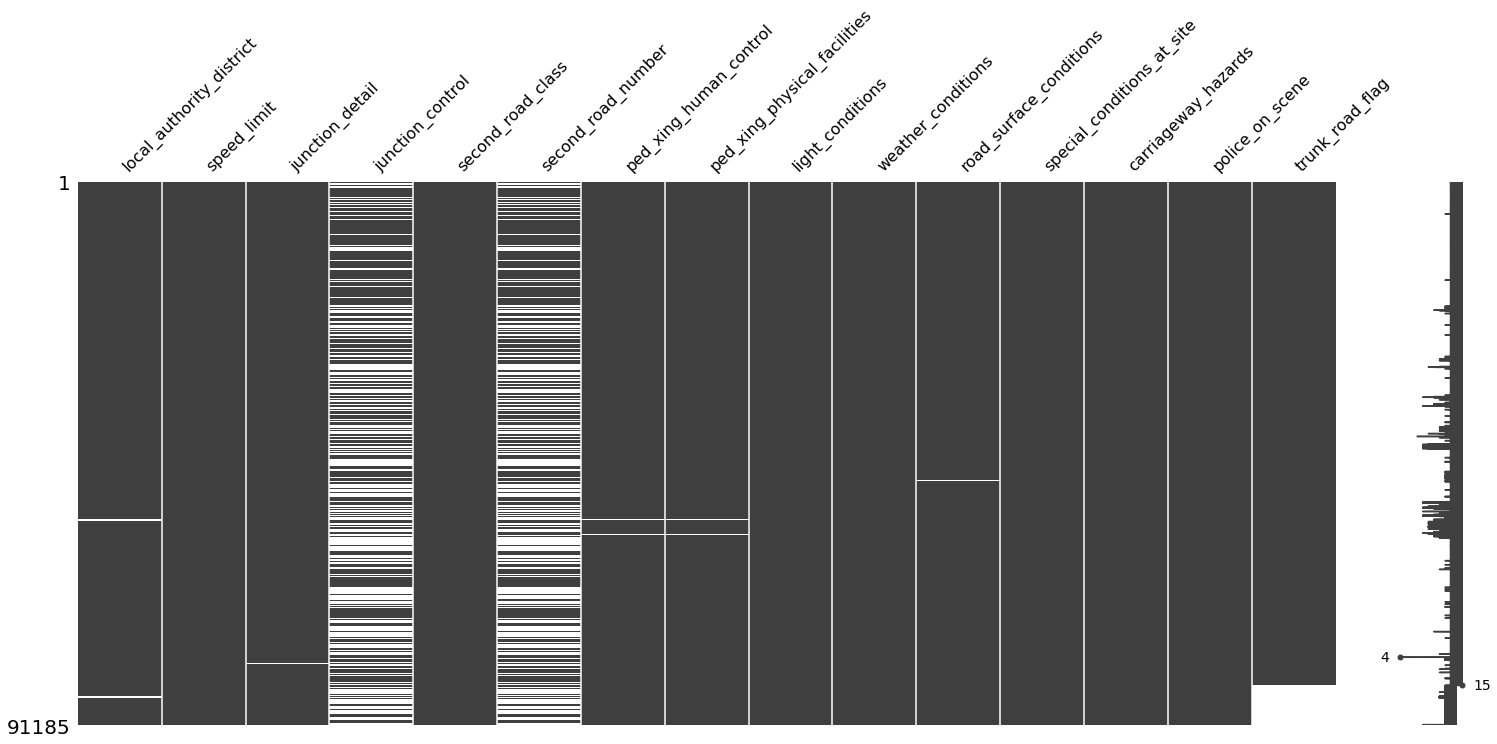

In [13]:
#dealing with other missing values:(many categories have -1 for missing value)
#visualise missing values with msno: from https://towardsdatascience.com/code-and-techniques-for-exploratory-data-analysis-a44c50953502
import missingno as msno # 
acc_df.replace(-1, np.nan, inplace=True)
missingdata_df = acc_df.columns[acc_df.isnull().any()].tolist()
msno.matrix(acc_df[missingdata_df])


In [14]:
acc_df.isna().sum().sort_values(ascending=False)

junction_control                38292
second_road_number              38039
trunk_road_flag                  6701
local_authority_district          985
road_surface_conditions           315
special_conditions_at_site        218
carriageway_hazards               208
ped_xing_human_control            143
ped_xing_physical_facilities      135
second_road_class                 110
speed_limit                        12
junction_detail                     2
light_conditions                    1
weather_conditions                  1
police_on_scene                     1
road_type                           0
urban_or_rural_area                 0
accident_index                      0
first_road_number                   0
accident_year                       0
accident_severity                   0
accident_reference                  0
location_easting_osgr               0
location_northing_osgr              0
longitude                           0
latitude                            0
police_force

In [15]:
acc_df['junction_control'][acc_df['second_road_number'].isna()]#['junction_control].hist()

0       NaN
3       NaN
12      NaN
13      NaN
15      NaN
         ..
91184   NaN
91186   NaN
91191   NaN
91193   NaN
91198   NaN
Name: junction_control, Length: 38039, dtype: float64

Accident	junction_control	0	Not at junction or within 20 metres
Accident	junction_control	1	Authorised person
Accident	junction_control	2	Auto traffic signal
Accident	junction_control	3	Stop sign
Accident	junction_control	4	Give way or uncontrolled
Accident	junction_control	-1	Data missing or out of range
Accident	junction_control	9	unknown (self reported)

Accident	second_road_number	1 to 9999	Number range
Accident	second_road_number	-1	Unknown
Accident	second_road_number	0	first_road_class is C or Unclassified.Do not have official numbers 


Accident	trunk_road_flag	1	Trunk (Roads managed by Highways England)
Accident	trunk_road_flag	2	Non-trunk
Accident	trunk_road_flag	-1	Data missing or out of range

The rest of missing values are 1% or less

In [30]:
acc_df['junction_control'][acc_df['second_road_number'].isna()].value_counts(dropna=False)

NaN    37927
4.0       96
2.0       13
9.0        2
3.0        1
Name: junction_control, dtype: int64

In [31]:
acc_df['second_road_number'][acc_df['junction_control'].isna()].value_counts(dropna=False)

NaN       37927
0.0         299
1.0           3
5183.0        2
141.0         2
          ...  
5500.0        1
460.0         1
5111.0        1
5250.0        1
762.0         1
Name: second_road_number, Length: 62, dtype: int64

## Numerical Features

array([[<AxesSubplot:title={'center':'number_of_casualties'}>,
        <AxesSubplot:title={'center':'number_of_vehicles'}>],
       [<AxesSubplot:title={'center':'speed_limit'}>, <AxesSubplot:>]],
      dtype=object)

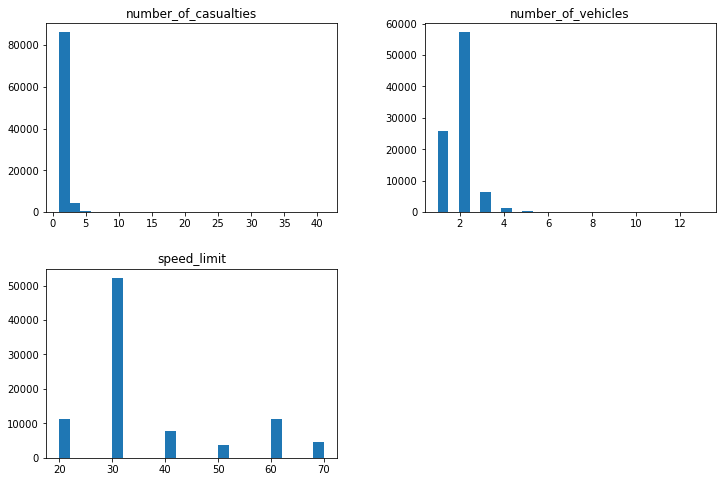

In [17]:
acc_df_num = acc_df[['number_of_casualties','number_of_vehicles','speed_limit']]
acc_df_num.hist( bins = 25, grid = False, figsize = (12,8))

### Numerical Location Features

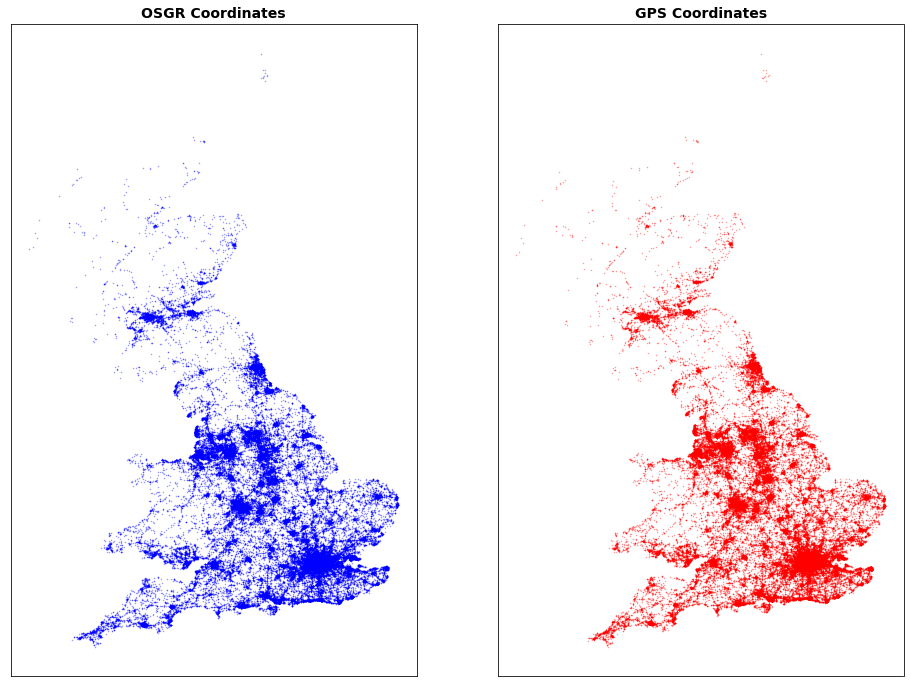

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
ax1.scatter(acc_df.location_easting_osgr,acc_df.location_northing_osgr, marker='.', alpha=0.4, s=1, c='blue')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("OSGR Coordinates", fontweight='bold', fontsize=14)
ax2.scatter(acc_df.longitude,acc_df.latitude, marker='.', alpha=0.4, s=1, c='red')
ax2.set_xticks([])
ax2.set_yticks([])
t=ax2.set_title("GPS Coordinates", fontweight='bold', fontsize=14)


as shown here they practically contain the same information and as lat and long is more widely used we drop OSGR coordinates

In [19]:
acc_df = acc_df.drop(axis=1,columns=['location_easting_osgr','location_northing_osgr'])

In [20]:
acc_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
accident_year,91185.0,2020.000000,0.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
longitude,91185.0,-1.189258,1.367786,-7.497375,-2.107789,-1.046912,-0.125238,1.756257
latitude,91185.0,52.351073,1.327573,49.970479,51.457237,51.763385,53.297386,60.541144
police_force,91185.0,27.485080,24.547887,1.000000,4.000000,22.000000,45.000000,99.000000
accident_severity,91185.0,2.768218,0.456695,1.000000,3.000000,3.000000,3.000000,3.000000
number_of_vehicles,91185.0,1.835258,0.677299,1.000000,1.000000,2.000000,2.000000,13.000000
number_of_casualties,91185.0,1.267390,0.681506,1.000000,1.000000,1.000000,1.000000,41.000000
day_of_week,91185.0,4.121467,1.932236,1.000000,2.000000,4.000000,6.000000,7.000000
local_authority_district,90200.0,314.905133,252.702327,1.000000,71.000000,300.000000,505.000000,941.000000
first_road_class,91185.0,4.220310,1.443469,1.000000,3.000000,4.000000,6.000000,6.000000


array([[<AxesSubplot:title={'center':'accident_year'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'police_force'}>,
        <AxesSubplot:title={'center':'accident_severity'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles'}>,
        <AxesSubplot:title={'center':'number_of_casualties'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'local_authority_district'}>],
       [<AxesSubplot:title={'center':'first_road_class'}>,
        <AxesSubplot:title={'center':'first_road_number'}>,
        <AxesSubplot:title={'center':'road_type'}>,
        <AxesSubplot:title={'center':'speed_limit'}>,
        <AxesSubplot:title={'center':'junction_detail'}>],
       [<AxesSubplot:title={'center':'junction_control'}>,
        <AxesSubplot:title={'center':'second_road_class'}>,
        <AxesSubplot:title={'

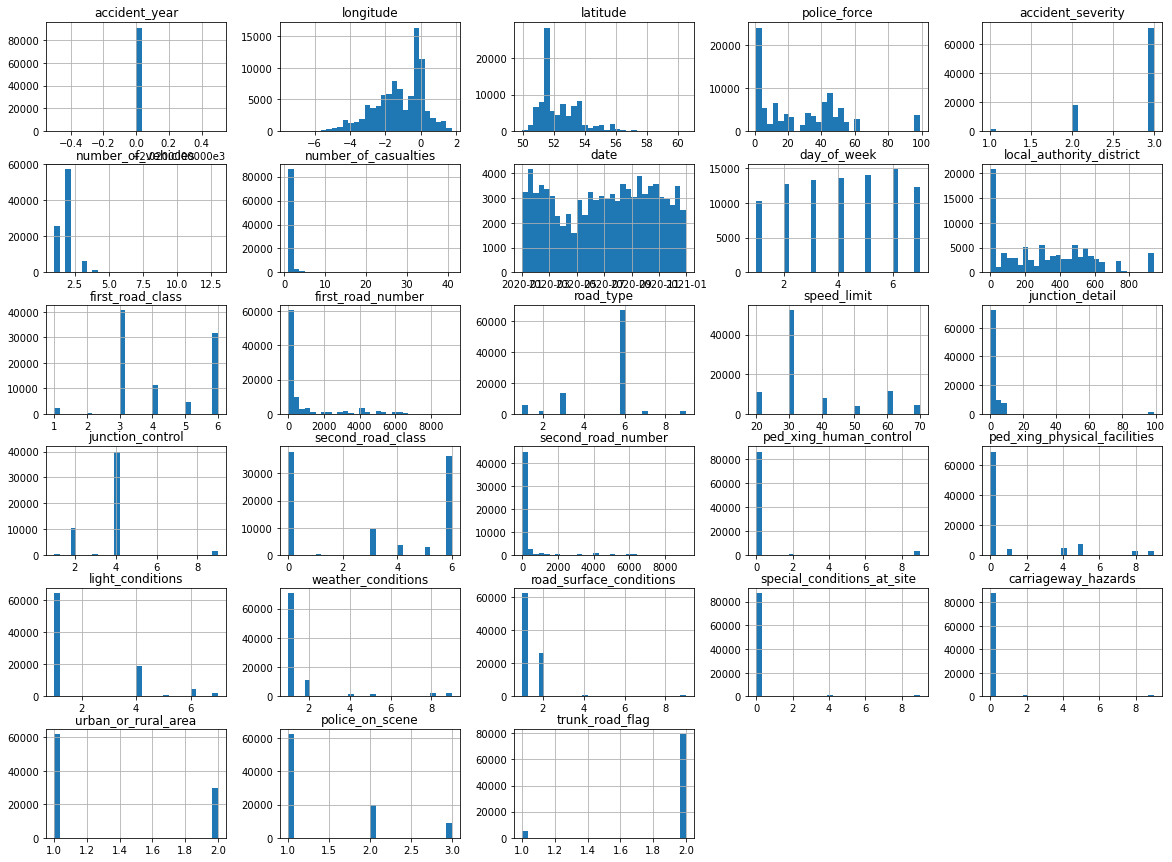

In [21]:
#Most of the variables are categorical with a low cardinality 
acc_df.hist(bins=30, figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

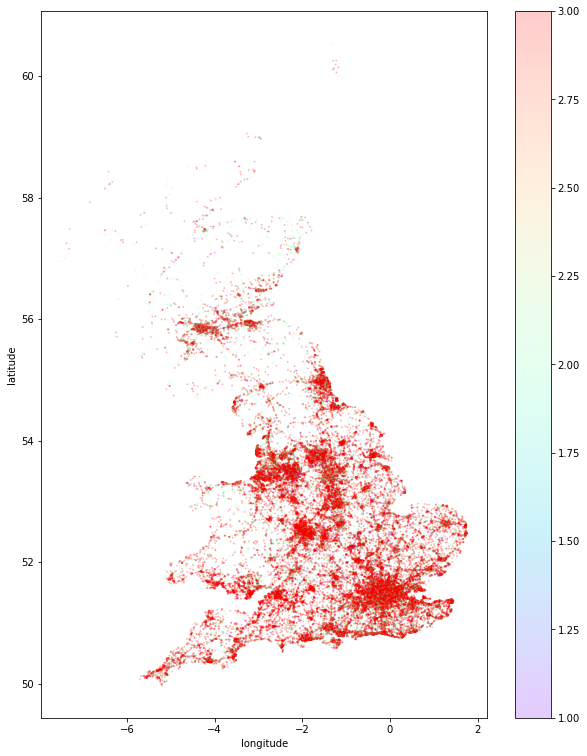

In [48]:
# 
acc_df.plot(kind="scatter", x="longitude", y="latitude", figsize = (10,13), alpha=0.2,s=1,
                c=acc_df["accident_severity"], cmap=plt.get_cmap("rainbow"), colorbar=True,
                sharex=False)
#Road accidents UK 2020. Green — attended; Grey — not attended

A common way to check for the relations between the variables is to calculate correlation (e.g. Pearson Correlation Coefficient). However, the vast majority of the variables in the accident dataset are categorical. We can not use correlation on our dataset, as correlation measures linear relationships between two quantitative variables. Therefore, I use Chi-Squared Test to identify a significant association between two categorical variables.

After staring at the data for a while, I came up with a hypothesis that one of the most important factors for a police officer to make a decision wether or not to attend an accident would be the accident severity. Then our first hypothesis to test would be the following:

H0: The severity of the accident has no impact on the probability of a police officer to attend an accident.

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

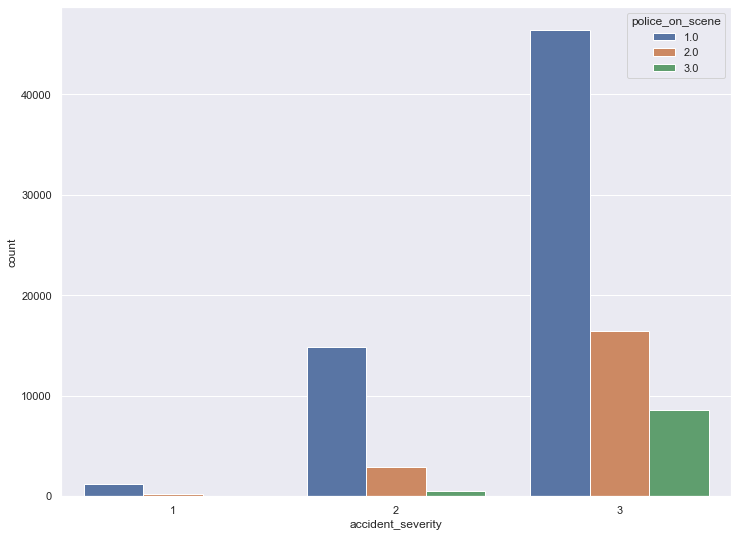

In [52]:
sns.set(rc={'figure.figsize':(12,9)})
ax=sns.countplot(x='accident_severity', hue='police_on_scene', data=acc_df)
for p in ax.patches:
        patch_height = p.get_height
        if np.isnan(patch_height):
            patch_height = 0
        ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

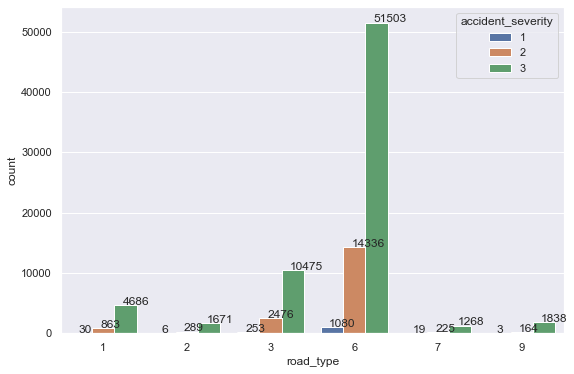

In [58]:
#acc_df.accident_severity.hist(bins=5)
sns.set(rc={'figure.figsize':(9,6)})
ax=sns.countplot(x='road_type', hue='accident_severity', data=acc_df)
for p in ax.patches:
        patch_height = p.get_height()
        if np.isnan(patch_height):
            patch_height = 0
        ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

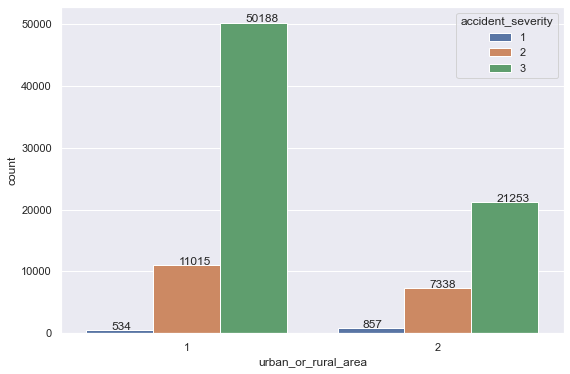

In [60]:
#acc_df.accident_severity.hist(bins=5)
sns.set(rc={'figure.figsize':(9,6)})
ax=sns.countplot(x='urban_or_rural_area', hue='accident_severity', data=acc_df)
for p in ax.patches:
        patch_height = p.get_height()
        if np.isnan(patch_height):
            patch_height = 0
        ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

In [61]:
acc_df.describe(include=object).T

,count,unique,top,freq
accident_index,91185,91185,2020010219808,1
accident_reference,91185,91185,10219808,1
time,91185,1438,17:00,862
local_authority_ons_district,91185,378,E08000025,1802
local_authority_highway,91185,206,E10000016,2964
lsoa_of_accident_location,91185,25931,-1,3837
